In [1]:
import json
import os
import re

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ALL_MODELS_FOLDER = "../models/"
ALL_FIGURES_FOLDER = "../figures/"

In [3]:
bpc_losses = {}
eval_losses = {}

for subdir, _, files in os.walk(ALL_MODELS_FOLDER):
    if "trainer_state.json" in files:
        file_path = os.path.join(subdir, "trainer_state.json")
        with open(file_path, "r") as f:
            data = json.load(f)
            bpc_list = []
            eval_loss_list = []
            for log_entry in data.get("log_history", []):
                if "eval_bpc" in log_entry:
                    bpc_list.append(log_entry["eval_bpc"])
                    eval_loss_list.append(log_entry["eval_loss"])

            match = re.search(r"models[\\/](.*?)(\\|/|$)", subdir)
            if match:
                model_name = match.group(1)
                if bpc_list:
                    bpc_losses[model_name] = bpc_list
                    eval_losses[model_name] = eval_loss_list

In [45]:
colors = {
    "es": ["#4E9A84", "#438D77", "#367D6A", "#295E57"],  
    "tr": ["#68B3C7", "#4DA1B4", "#3B7D98", "#2C5B73"]   
}

all_bpcs = [value for sublist in {k: v for k, v in bpc_losses.items()}.values() for value in sublist]
y_limits = (min(all_bpcs), max(all_bpcs))

In [12]:
def plot_losses(ax, model_losses, color_list, y_limits, xaxis_name):
    """
    Plots loss curves for a specific language.
    """
    color_idx = 0  #

    for model_name, bpc_list in model_losses.items():
        lan = re.search(r"(tr|es)", model_name).group(0)
        vs = re.search(r"\d+", model_name).group(0)
        vs_level = re.search(r"vs(\d+)", model_name).group(1)
        
        steps = np.arange(1, len(bpc_list) + 1) * 5
        ax.plot(
            steps, 
            bpc_list, 
            label=f"{lan}_{int(vs) // 1000}k", 
            color=color_list[color_idx % len(color_list)]
        )
        color_idx += 1  # Cycle through the gradient colors
    
    ax.set_xlabel("Training Steps")
    ax.set_ylabel(xaxis_name)
    ax.set_ylim(y_limits)
    ax.legend(loc="upper right", fontsize="small")
    ax.grid(True, linestyle='-', color='gray', linewidth=0.5, alpha=0.25)

In [14]:
def plot_and_save_losses(losses, save_name, colors, yaxis_name):
    """
    Plots and saves BPC loss curves for ES and TR models.
    
    Parameters:
    - bpc_losses (dict): A dictionary of BPC losses with model names as keys.
    - save_name (str): The file name (including path) to save the plot.
    - colors (dict): A dictionary of colors for ES and TR models (e.g., {'es': 'green', 'tr': 'blue'}).
    """

    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

    es_losses = {k: v for k, v in losses.items() if 'es' in k}
    tr_losses = {k: v for k, v in losses.items() if 'tr' in k}
    
        
    plot_losses(ax1, es_losses, colors["es"], y_limits, yaxis_name)
    plot_losses(ax2, tr_losses, colors["tr"], y_limits, yaxis_name)

    
    plt.tight_layout()
    plt.savefig(ALL_FIGURES_FOLDER+save_name, format='svg')
    plt.show()

In [46]:
bpe_bpc = {k: v for k, v in bpc_losses.items() if "BPE" in k}
wordpiece_bpc = {k: v for k, v in bpc_losses.items() if "WordPiece" in k}
unigram_bpc  = {k: v for k, v in bpc_losses.items() if "Unigram" in k}

In [51]:
es_values

{'model_es_BPE_vs10000': [3.9953058180117345,
  3.815965256450828,
  3.6624676062772807,
  3.481875157404405,
  3.315451010890085,
  3.0786520799016173,
  3.0615162639338633,
  2.991322781436518,
  2.9219343985406874,
  2.9342840626559132,
  2.920990074048429,
  2.8923648238112234,
  2.9088227385815504,
  2.8587452818780017,
  2.831865208228805,
  2.8834524070248495,
  2.7975733162665746,
  2.8040014855765003,
  2.8111562262478,
  2.7733700315133722,
  2.757835074782902,
  2.768960140978562,
  2.73191926615214,
  2.769781908432716,
  2.728348755105268,
  2.7338062432001213,
  2.734358180148394,
  2.7231005502507446,
  2.7593194678475075,
  2.695736842111602,
  2.7494148338223803,
  2.709901806599649,
  2.7272720019433665,
  2.7156565129203374,
  2.7293385863560506,
  2.763826265201652,
  2.68039728174644,
  2.7158696393102053,
  2.753272422638411,
  2.68973129989913,
  2.695348935977371,
  2.733073509204307,
  2.74277574325526,
  2.6612346010851176,
  2.6915696649563388,
  2.7080894752

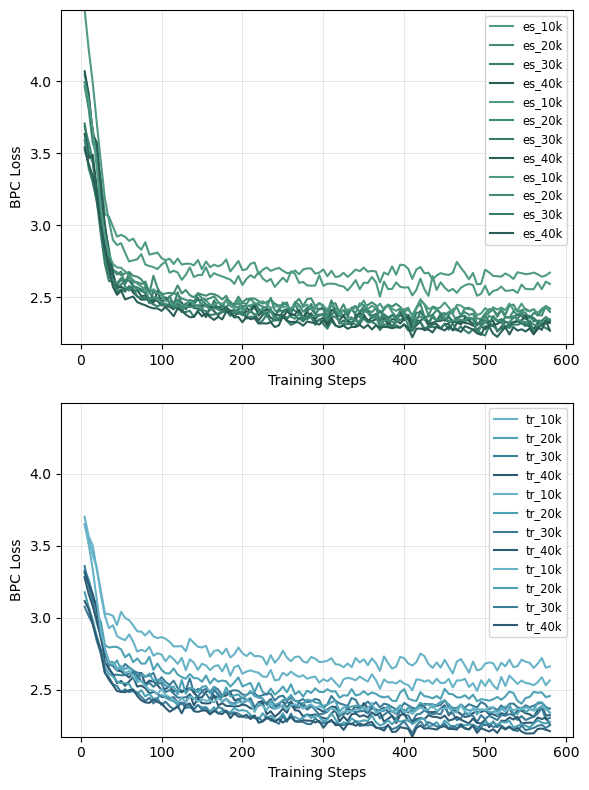

In [15]:
plot_and_save_losses(bpc_losses, "bpe_bpc.svg", colors, 'BPC Loss')

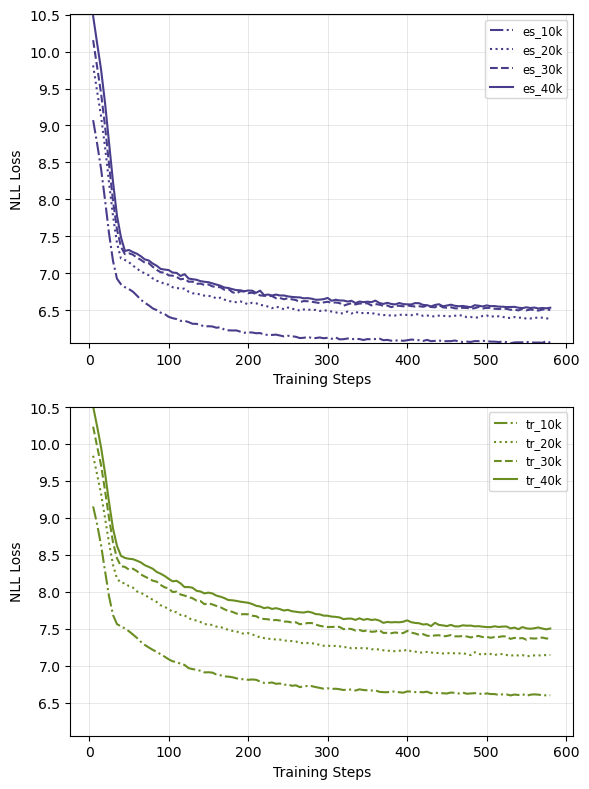

In [164]:
plot_and_save_losses(eval_losses, "bpe_loss.svg", colors, 'NLL Loss')